# Case Study 2: Predicting bank loan defaults and credit scores

You are a data scientist working for a consumer bank that wants to use their data on customer savings, loans, and spending habits to predict whether they will default on a loan. They also want to know if they can predict what credit score a credit rating agency will give them.

They give you a dataset 'credit_score.csv' of 1000 customers who took out loans recently and ask you to see if there is any "signal" in the data to make this prediction.

In [189]:
# load numpy and pandas and the dataset
import numpy as np
import pandas as pd


df = pd.read_csv('credit_score.csv')

print(df)

        CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0    C02COQEVYU   33269        0   532304            0.0000        16.0000   
1    C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2    C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3    C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4    C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   
..          ...     ...      ...      ...               ...            ...   
995  CZQHJC9HDH  328892  1465066  5501471            4.4546        16.7273   
996  CZRA4MLB0P   81404    88805   680837            1.0909         8.3637   
997  CZSOD1KVFX       0    42428    30760            3.2379         8.1889   
998  CZWC76UAUT   36011     8002   604181            0.2222        16.7777   
999  CZZV5B3SAL   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  .

## Data Processing

Here are steps I recommend to process the data in preparation for analysis.

- We see the column 'CUST_ID', which we can guess is the customer ID and should not be used as a predictor. Check that these are unique for every entry in the dataset, and then remove it from the columns.
- The targets are 'DEFAULT' (whether a loan defaulted or not) and 'CREDIT_SCORE' (the customers credit score). Set both of these apart for analyses later.
- Create your DataFrame of predictors. Check if any need to be processed as categorical variables. If so, do it like we did last week, or you can look at the function pd.get_dummies(), which can help you easily make one-hot encodings.
- Take note of which are real-valued and likely need to be standardized before analyses later.


***Solutions***
Let's first check that there is indeed a unique customer ID for every entry in this dataset:

In [190]:
print("The number of unique customer IDs is:", df['CUST_ID'].unique().size)
print("The number of entries in the dataset is:", df.shape[0])

The number of unique customer IDs is: 1000
The number of entries in the dataset is: 1000


***Solutions***
Good. So let's remove CUST_ID, but to keep it around (in case you need to reference it later) you can set it as the DataFrame Index. Note that a DataFrame Index (or column list) should never have a duplicate label.

In [192]:
# df = df.set_index('CUST_ID', drop=True)  # Sets CUST_ID to be the DataFrame Index and then drops it from the columns
# print(df)
print(df.columns)  # if you want to see the list of columns now, CUST_ID will no longer be there
print(df.describe())  # this is another way of summarizing the dataset with some statistics

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING',

***Solutions***
Now let's make the predictors and targets

In [193]:
Y_default = df['DEFAULT']
Y_credit = df['CREDIT_SCORE']

# filter out the DEFAULT and CREDIT_SCORE columns
predictors = []
for key in df.columns:
    if (key != 'DEFAULT') and (key != 'CREDIT_SCORE'):
        predictors.append(key)

# predictors = [key for key in df.columns if ((key != 'DEFAULT') and (key != 'CREDIT_SCORE'))]  # fancy way of doing the above loop

X = df[predictors]
print(X)

            INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
CUST_ID                                                                 
C02COQEVYU   33269        0   532304            0.0000        16.0000   
C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   
...            ...      ...      ...               ...            ...   
CZQHJC9HDH  328892  1465066  5501471            4.4546        16.7273   
CZRA4MLB0P   81404    88805   680837            1.0909         8.3637   
CZSOD1KVFX       0    42428    30760            3.2379         8.1889   
CZWC76UAUT   36011     8002   604181            0.2222        16.7777   
CZZV5B3SAL   44266   309859    44266            6.9999         1.0000   

            R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTH

***Solutions***
It's not easy to investigate all columns, so I just opened up the CSV file in Excel to quickly glance over them. It looks like only 'CAT_GAMBLING' needs to be processed into a one-hot encoding.

You can create a new set of 0-1 vectors like we did last week, or you can use Panda's pd.get_dummies() method, which makes it pretty easy. 

I used pd.get_dummies() here. Note that the option 'dtype=int' makes it return integer-valued columns (rather than boolean) and 'drop_first=True' will arbitrarily drop one of the new one-hot encoded columns. This latter step is necessary if you are not using regularization (why? try to remember from last week). If you are using regularization, it's optional, but dropping it saves you one extra variable to fit, possibly reducing noise and making things run faster so in my opinion there's no reason not to do it.

After running this, I print the DataFrame again. Look at the final columns: 2 new 0-1 columns have been added to correspond to two (of the three) possible categorical values.

In [194]:
print("Unique values in categorical variable CAT_GAMBLING:", X['CAT_GAMBLING'].unique()) 

X_w_dummies = pd.get_dummies(data=X, columns=['CAT_GAMBLING'], dtype=int, drop_first=True)
print(X_w_dummies)

Unique values in categorical variable CAT_GAMBLING: ['High' 'No' 'Low']
            INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
CUST_ID                                                                 
C02COQEVYU   33269        0   532304            0.0000        16.0000   
C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   
...            ...      ...      ...               ...            ...   
CZQHJC9HDH  328892  1465066  5501471            4.4546        16.7273   
CZRA4MLB0P   81404    88805   680837            1.0909         8.3637   
CZSOD1KVFX       0    42428    30760            3.2379         8.1889   
CZWC76UAUT   36011     8002   604181            0.2222        16.7777   
CZZV5B3SAL   44266   309859    44266            6.99

To make life easier, I looked at the data in Excel and the below column names are the ones I think you should try to standardize.

***Solutions***
To prepare for model fitting, we need to take note of which predictors need to be standardize. Usually, this should be done with care by understanding your dataset and the problem. I again looked at this CSV file in Excel and it looks to me like anything with 'CAT_' at the start of its name is a categorical variable (and so shouldn't be re-scaled).

Anything with 'R_' at the start of its name looks like a ratio, so maybe we don't have to standardize it, but it is still possible the scale of the variable could be very different from others. Without knowing more about it, I have decided to standardize those too.

In [196]:
columns_to_normalize = [
    'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12', 'T_TAX_6', 'R_TAX',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'T_TRAVEL_6', 'R_TRAVEL', 'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_UTILITIES_6', 'R_UTILITIES',
       'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'R_EXPENDITURE',
       'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT',
]

In [197]:
a = {}
a['a'] = 1
a['b'] = 2
a['c'] = 'hello'

In [198]:
print(a)
a['b']

{'a': 1, 'b': 2, 'c': 'hello'}


2

## Classification experiment 1

Now predict the binary label 'DEFAULT'. Run an experiment comparing Logistic regression with no regularization, with L1 regularization, and with L2 regularization. You should probably run multiple cross validation splits, like last week.

Since this is a classification experiment, use the AUC score as your performance metric. Scikit-learn has the method: 'sklearn.metrics.roc_auc_score'.

Getting the Logistic Regression models to behave well requires some tweaking. I have done this for you to save you some time, but in the future you should get used to playing around with them and figuring out good settings yourself. Use the following method calls, where the training dataset needs to be created appropriately.

In [355]:
def compute_log_likelihood(Y_test, linear): 
    return np.sum(np.where(Y_test == 1,
                        linear - np.log1p(np.exp(linear)),  
                        -np.log1p(np.exp(linear))))

In [356]:
means_ = dict()
stds_ = dict()

for model_name in ['logreg', 'logreg_l1', 'logreg_l2']:
    means_[model_name] = []
    stds_[model_name] = []

In [357]:
from sklearn.linear_model import LogisticRegression  # logistic regression with optionally built in regularization.
from sklearn.linear_model import LogisticRegressionCV  # logistic regression with built in regularization. The penalty parameter is Cross-validated
from sklearn.metrics import roc_auc_score # computes the AUC score
import matplotlib.pyplot as plt # for plotting
import time # for timekeeping


"""
Use the methods like this, which should look similar to what we did last week:

    clf = LogisticRegression(penalty=None, max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  # the .fit method operates on the clf object in-place
    Y_pred = clf.predict_proba(X_test)  # this gives us the probabilities of each label
    print(clf.classes_)  # look at this to see the order of the labels in Y_pred
    Y_pred_P1 = Y_pred[:, 1]  # so this is the probability of assigning Y=1
    
For L1 regularization, the following settings performed well for me:

    clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=10000)  # uses 5-fold cross validation by default
    
And finally for L2 regularization, the following settings performed well for me:

    clf = LogisticRegressionCV(penalty='l2', max_iter=10000)  # uses 5-fold cross validation by default

You use roc_auc_score like this (definitely google the documentation for all of these methods):

    auc = roc_auc_score(Y_test, Y_pred_P1)
    
where Y_test is a vector of the true 0-1 labels and Y_pred_P1 is a corresponding vector of PROBABILITIES for Y=1.
See the example code I wrote above to see how to predict the probabilities P(Y=1).

"""

n_splits = 20  # like last week, we will do 20 cross validation splits

indices = list(range(X_w_dummies.shape[0]))
n_train = int(len(indices) * .85)  # 85% train, 15% split

scores = {}  # this time we will use a dictionary structure to contain the errors
for model_name in ['logreg', 'logreg_l1', 'logreg_l2']:
    scores[model_name] = []  # initialize this dictionary entry to an empty list

# I'm lazy so I'll just do random sampling of test sets (instead of K-fold cross validation)
for i_ in range(n_splits):
    
    t_start = time.time()  # used to time things
    
    np.random.shuffle(indices)  # shuffles the list in-place, so returns nothing
    train_inds = indices[:n_train]  # the first 85% are training indices
    test_inds = indices[n_train:]  # the remaining 15% are testing indices
    
    X_train = X_w_dummies.iloc[train_inds, :].copy()  # remember .iloc is used for integer indexing!
    X_test = X_w_dummies.iloc[test_inds, :].copy()
    
    Y_train = Y_default.iloc[train_inds]
    Y_test = Y_default.iloc[test_inds]
    
    # standardize the predictors
    for key in columns_to_normalize:
        x_mean = X_train[key].mean()
        x_std = X_train[key].std()
        X_train.loc[:, key] = (X_train[key] - x_mean) / x_std  # vectorized
        X_test.loc[:, key] = (X_test[key] - x_mean) / x_std  # use the training statistics to transform the test cases
    
    clf = LogisticRegression(penalty=None, max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  # the .fit method operates on the clf object in-place
#     Y_pred = clf.predict_proba(X_test)  # this gives us the probabilities of each label
    linear = clf.decision_function(X_test)
    # print(clf.classes_)  # look at this to see the order of the labels in Y_pred
#     Y_pred_P1 = Y_pred[:, 1]  # P(Y=1)
#     auc = roc_auc_score(Y_test, Y_pred_P1)  
    log_likelihood = compute_log_likelihood(Y_test, linear)
#     print(log_likelihood)
#     log_likelihood = compute_log_likelihood(Y_test, X_test, clf.coef_[0, :], clf.intercept_[0])
    means_['logreg'].append(clf.coef_)
    scores['logreg'].append(log_likelihood)
    print("Finished logreg split:", i_)
    
    clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  
#     Y_pred = clf.predict_proba(X_test)  
#     Y_pred_P1 = Y_pred[:, 1]  
    linear = clf.decision_function(X_test)
#     auc = roc_auc_score(Y_test, Y_pred_P1)
    log_likelihood = compute_log_likelihood(Y_test, linear)
    means_['logreg_l1'].append(clf.coef_)
    scores['logreg_l1'].append(log_likelihood)
    print("Finished logreg l1 split:", i_)
    
    clf = LogisticRegressionCV(penalty='l2', max_iter=10000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  
#     Y_pred = clf.predict_proba(X_test) 
#     Y_pred_P1 = Y_pred[:, 1] 
    linear = clf.decision_function(X_test)
#     auc = roc_auc_score(Y_test, Y_pred_P1)
    log_likelihood = compute_log_likelihood(Y_test, linear)
    means_['logreg_l2'].append(clf.coef_)
    scores['logreg_l2'].append(log_likelihood)
    print("Finished logreg l2 split:", i_)
    
    t_elapsed = time.time() - t_start
    print("This split took: %.2f secs" % t_elapsed)

Finished logreg split: 0
Finished logreg l1 split: 0
Finished logreg l2 split: 0
This split took: 17.48 secs
Finished logreg split: 1
Finished logreg l1 split: 1
Finished logreg l2 split: 1
This split took: 17.32 secs
Finished logreg split: 2
Finished logreg l1 split: 2
Finished logreg l2 split: 2
This split took: 18.59 secs
Finished logreg split: 3
Finished logreg l1 split: 3
Finished logreg l2 split: 3
This split took: 20.08 secs
Finished logreg split: 4
Finished logreg l1 split: 4
Finished logreg l2 split: 4
This split took: 13.79 secs
Finished logreg split: 5
Finished logreg l1 split: 5
Finished logreg l2 split: 5
This split took: 17.84 secs
Finished logreg split: 6
Finished logreg l1 split: 6
Finished logreg l2 split: 6
This split took: 17.51 secs
Finished logreg split: 7
Finished logreg l1 split: 7
Finished logreg l2 split: 7
This split took: 23.38 secs
Finished logreg split: 8
Finished logreg l1 split: 8
Finished logreg l2 split: 8
This split took: 18.68 secs
Finished logreg spl

Text(0, 0.5, 'Log Likelihood')

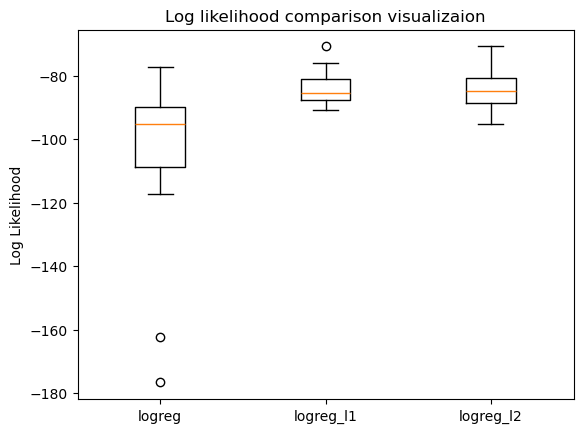

In [358]:
# plot the results
plt.figure()
plt.title('Log likelihood comparison visualizaion')
plt.boxplot([scores['logreg'], scores['logreg_l1'], scores['logreg_l2']], 
            labels=['logreg', 'logreg_l1', 'logreg_l2'])
plt.ylabel('Log Likelihood')

In [359]:
from scipy.stats import wilcoxon, ttest_rel

print(np.mean(scores['logreg']))
print(np.mean(scores['logreg_l1']))
print(np.mean(scores['logreg_l2']))
print(wilcoxon(scores['logreg'], scores['logreg_l1'], alternative="less").pvalue)
print(wilcoxon(scores['logreg_l2'], scores['logreg_l1'], alternative="less").pvalue)
print(wilcoxon(scores['logreg'], scores['logreg_l2'], alternative="less").pvalue)
print(ttest_rel(scores['logreg'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg_l2'], scores['logreg_l1']).pvalue)
print(ttest_rel(scores['logreg'], scores['logreg_l2']).pvalue)

-103.30739375029161
-83.96084011322907
-84.77239115397562
1.9073486328125e-06
0.0291290283203125
9.5367431640625e-07
0.0016923475104692754
0.07795880338397713
0.0019967835440386056


## According to the above p-values, Logreg_l1 was significantly outperforming Logreg_l2 and Logreg, and Logreg_l2 was significantly outperforming Logreg.

In [360]:
import matplotlib.pyplot as plt

rmeans_ = dict()
for model_name in ['logreg', 'logreg_l1', 'logreg_l2']:
    stds_[model_name] = np.std(np.array(means_[model_name]), axis=0)
    rmeans_[model_name] = np.mean(np.array(means_[model_name]), axis=0)

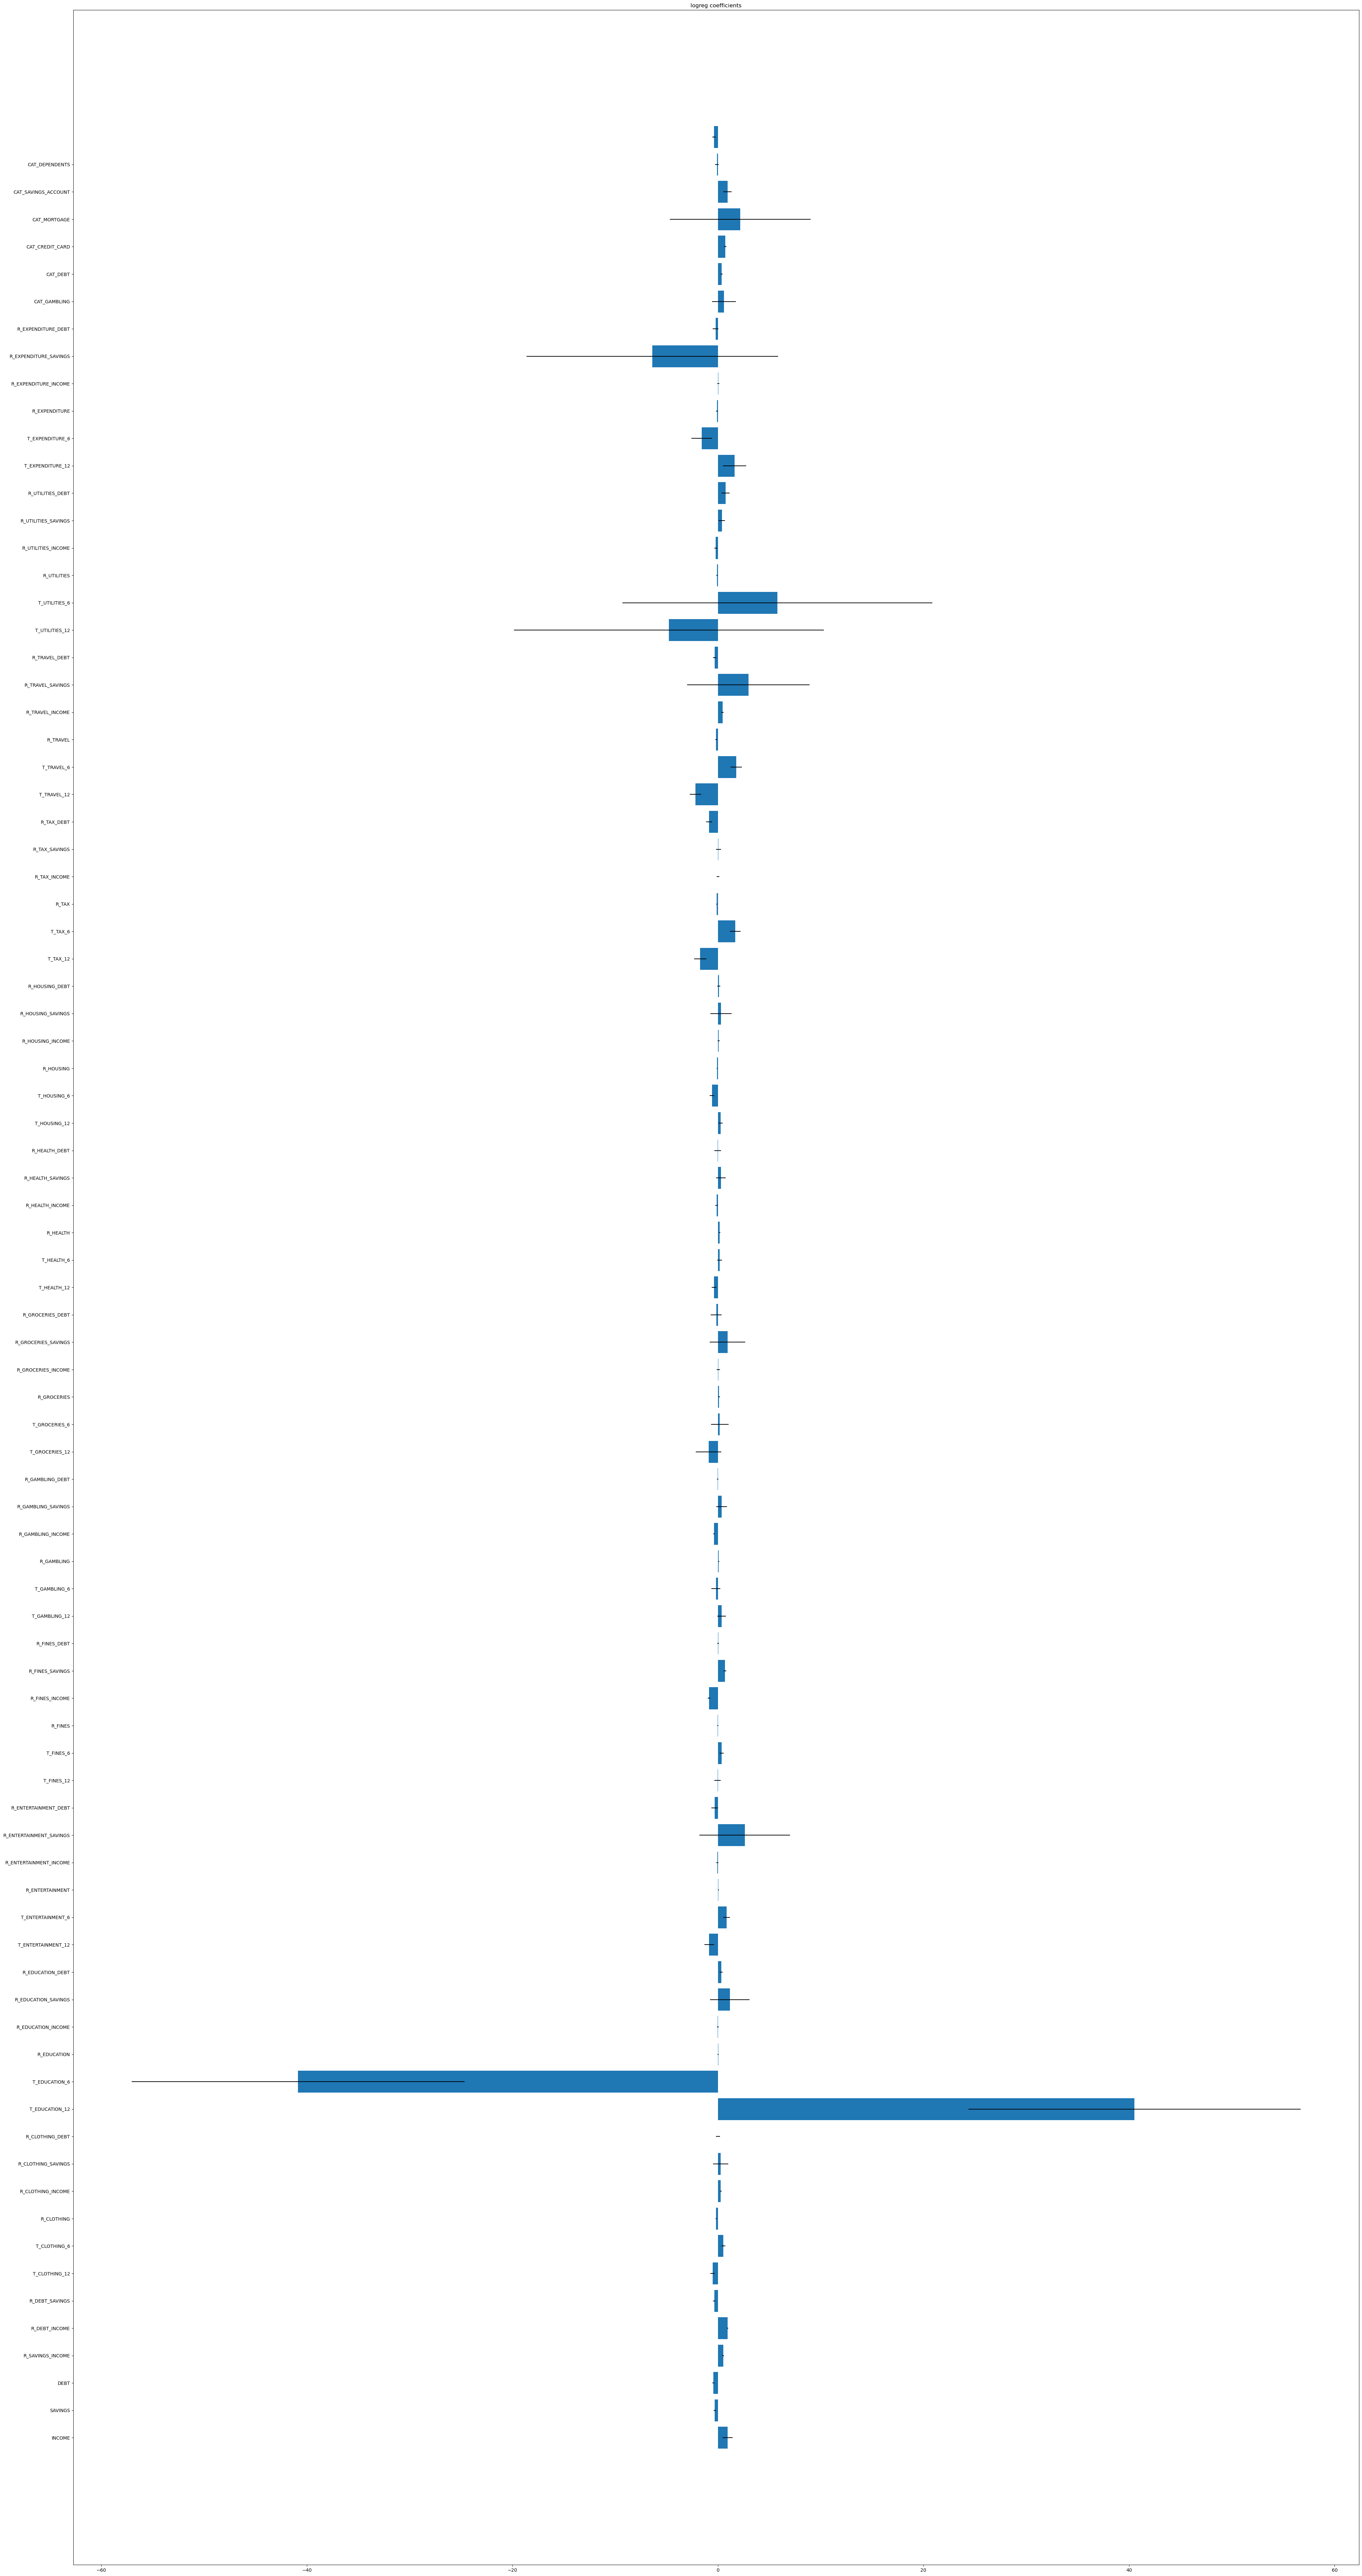

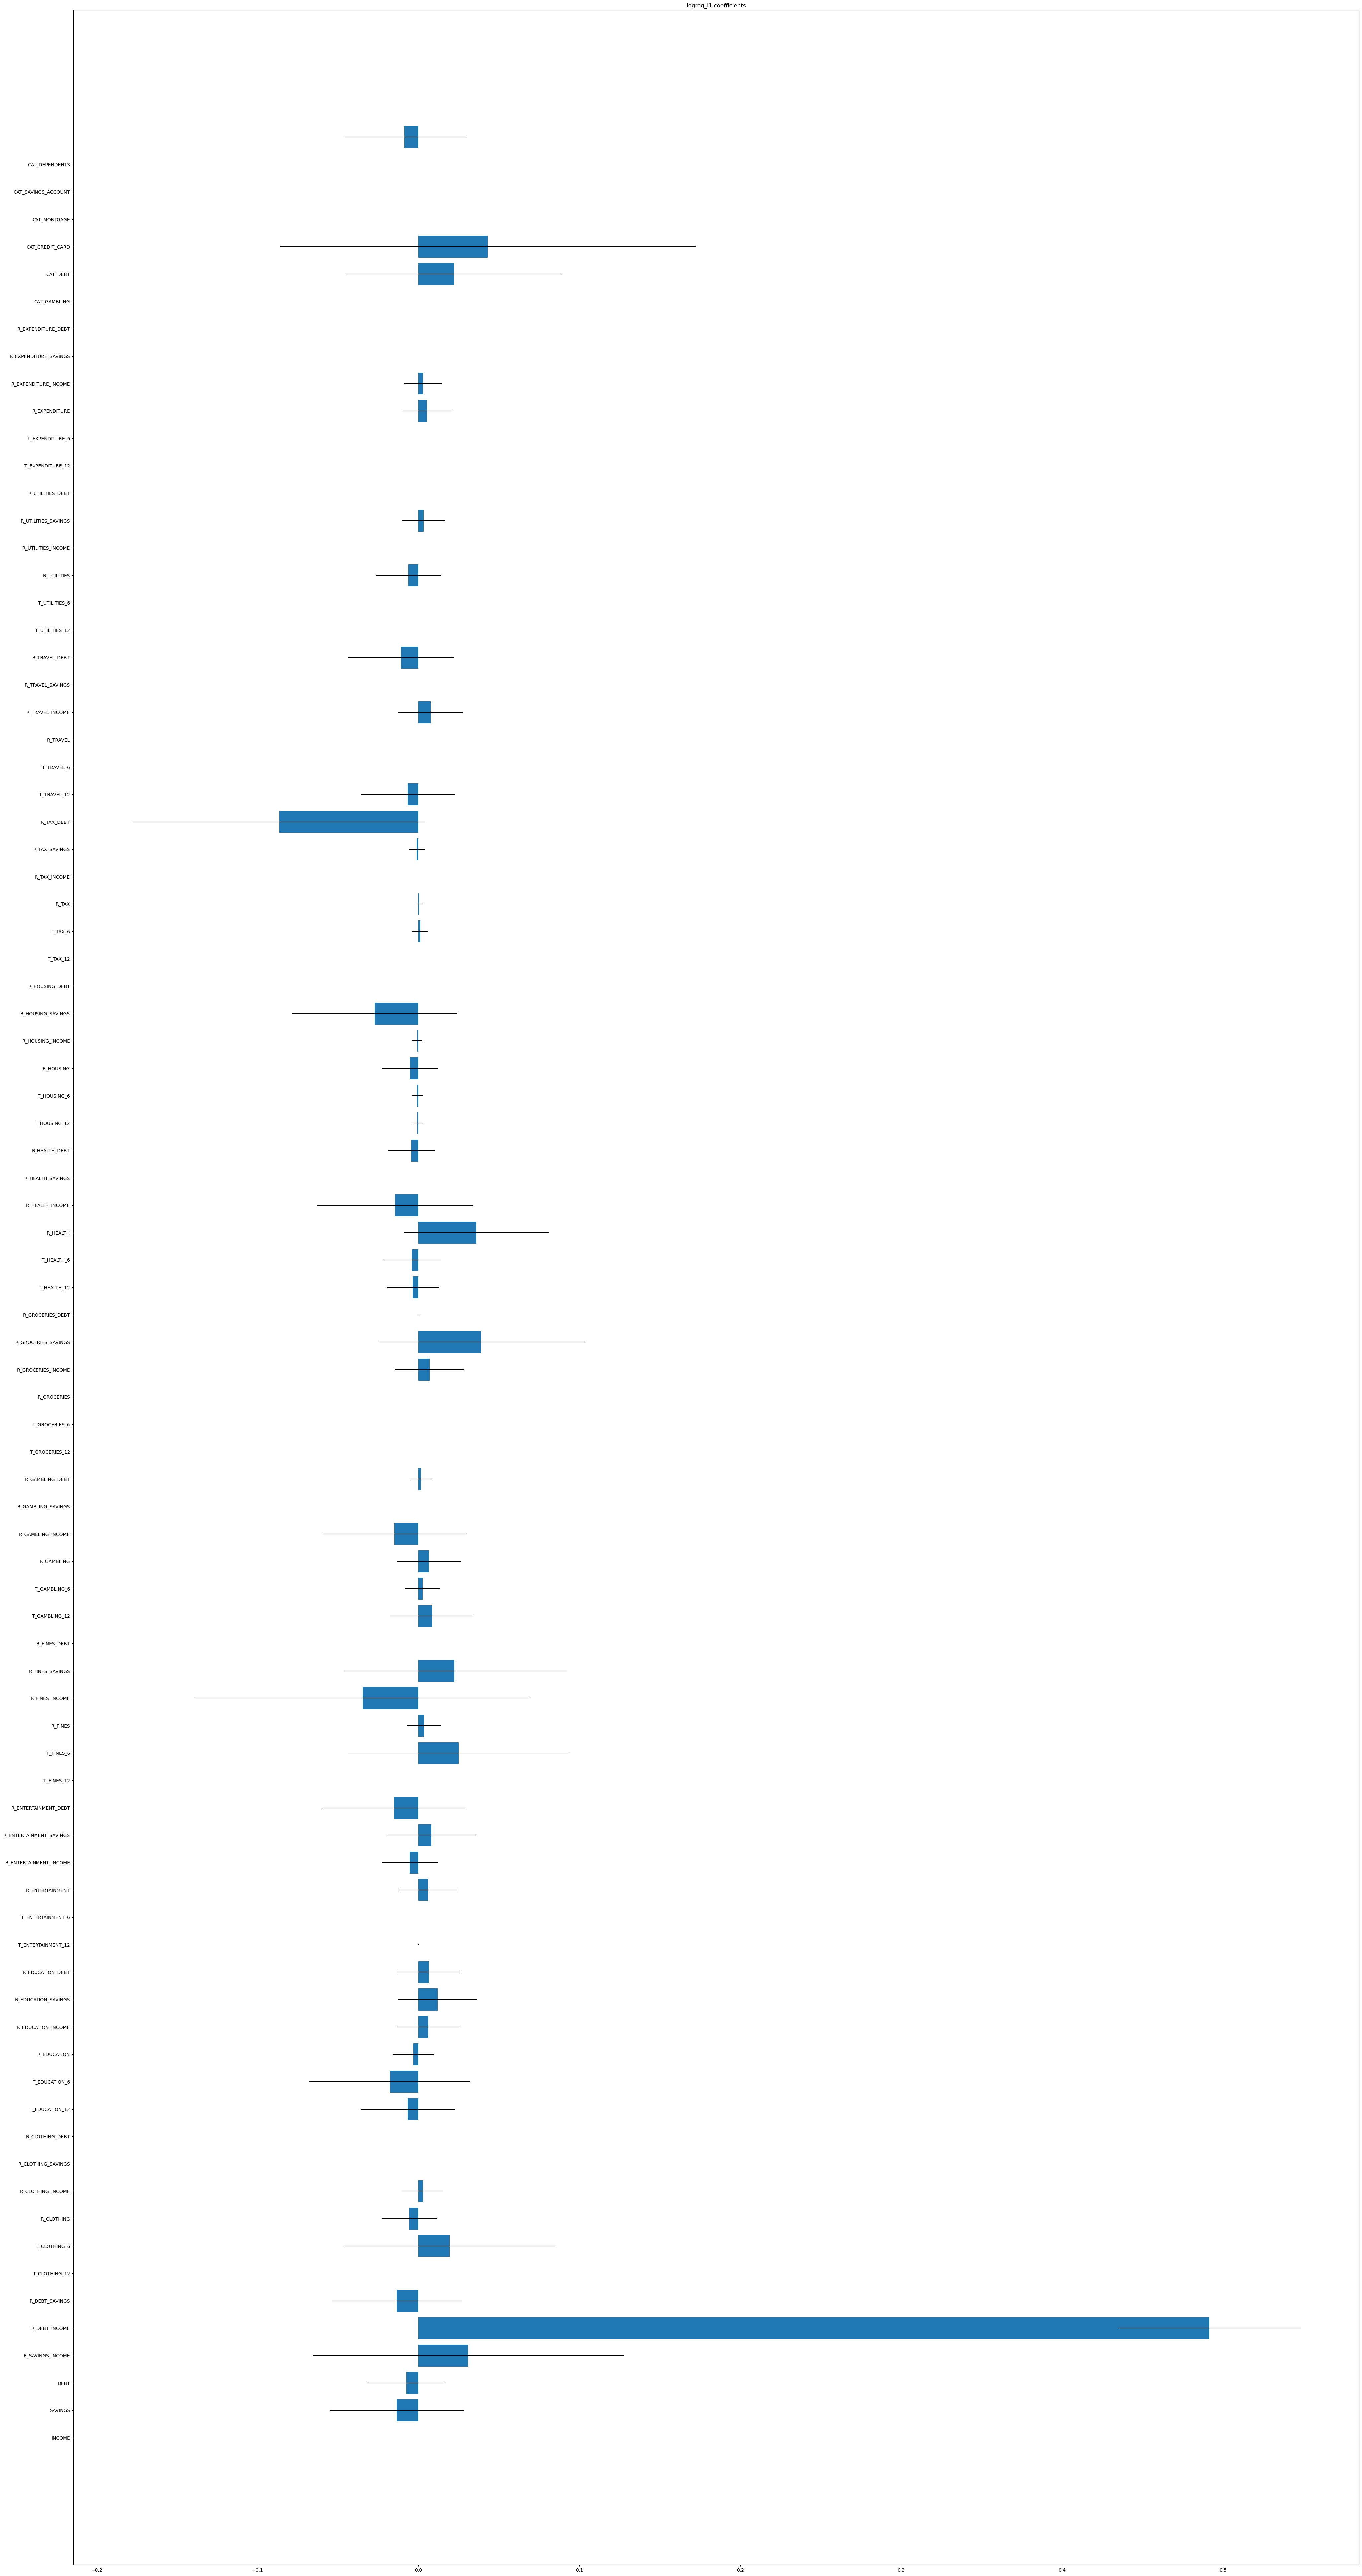

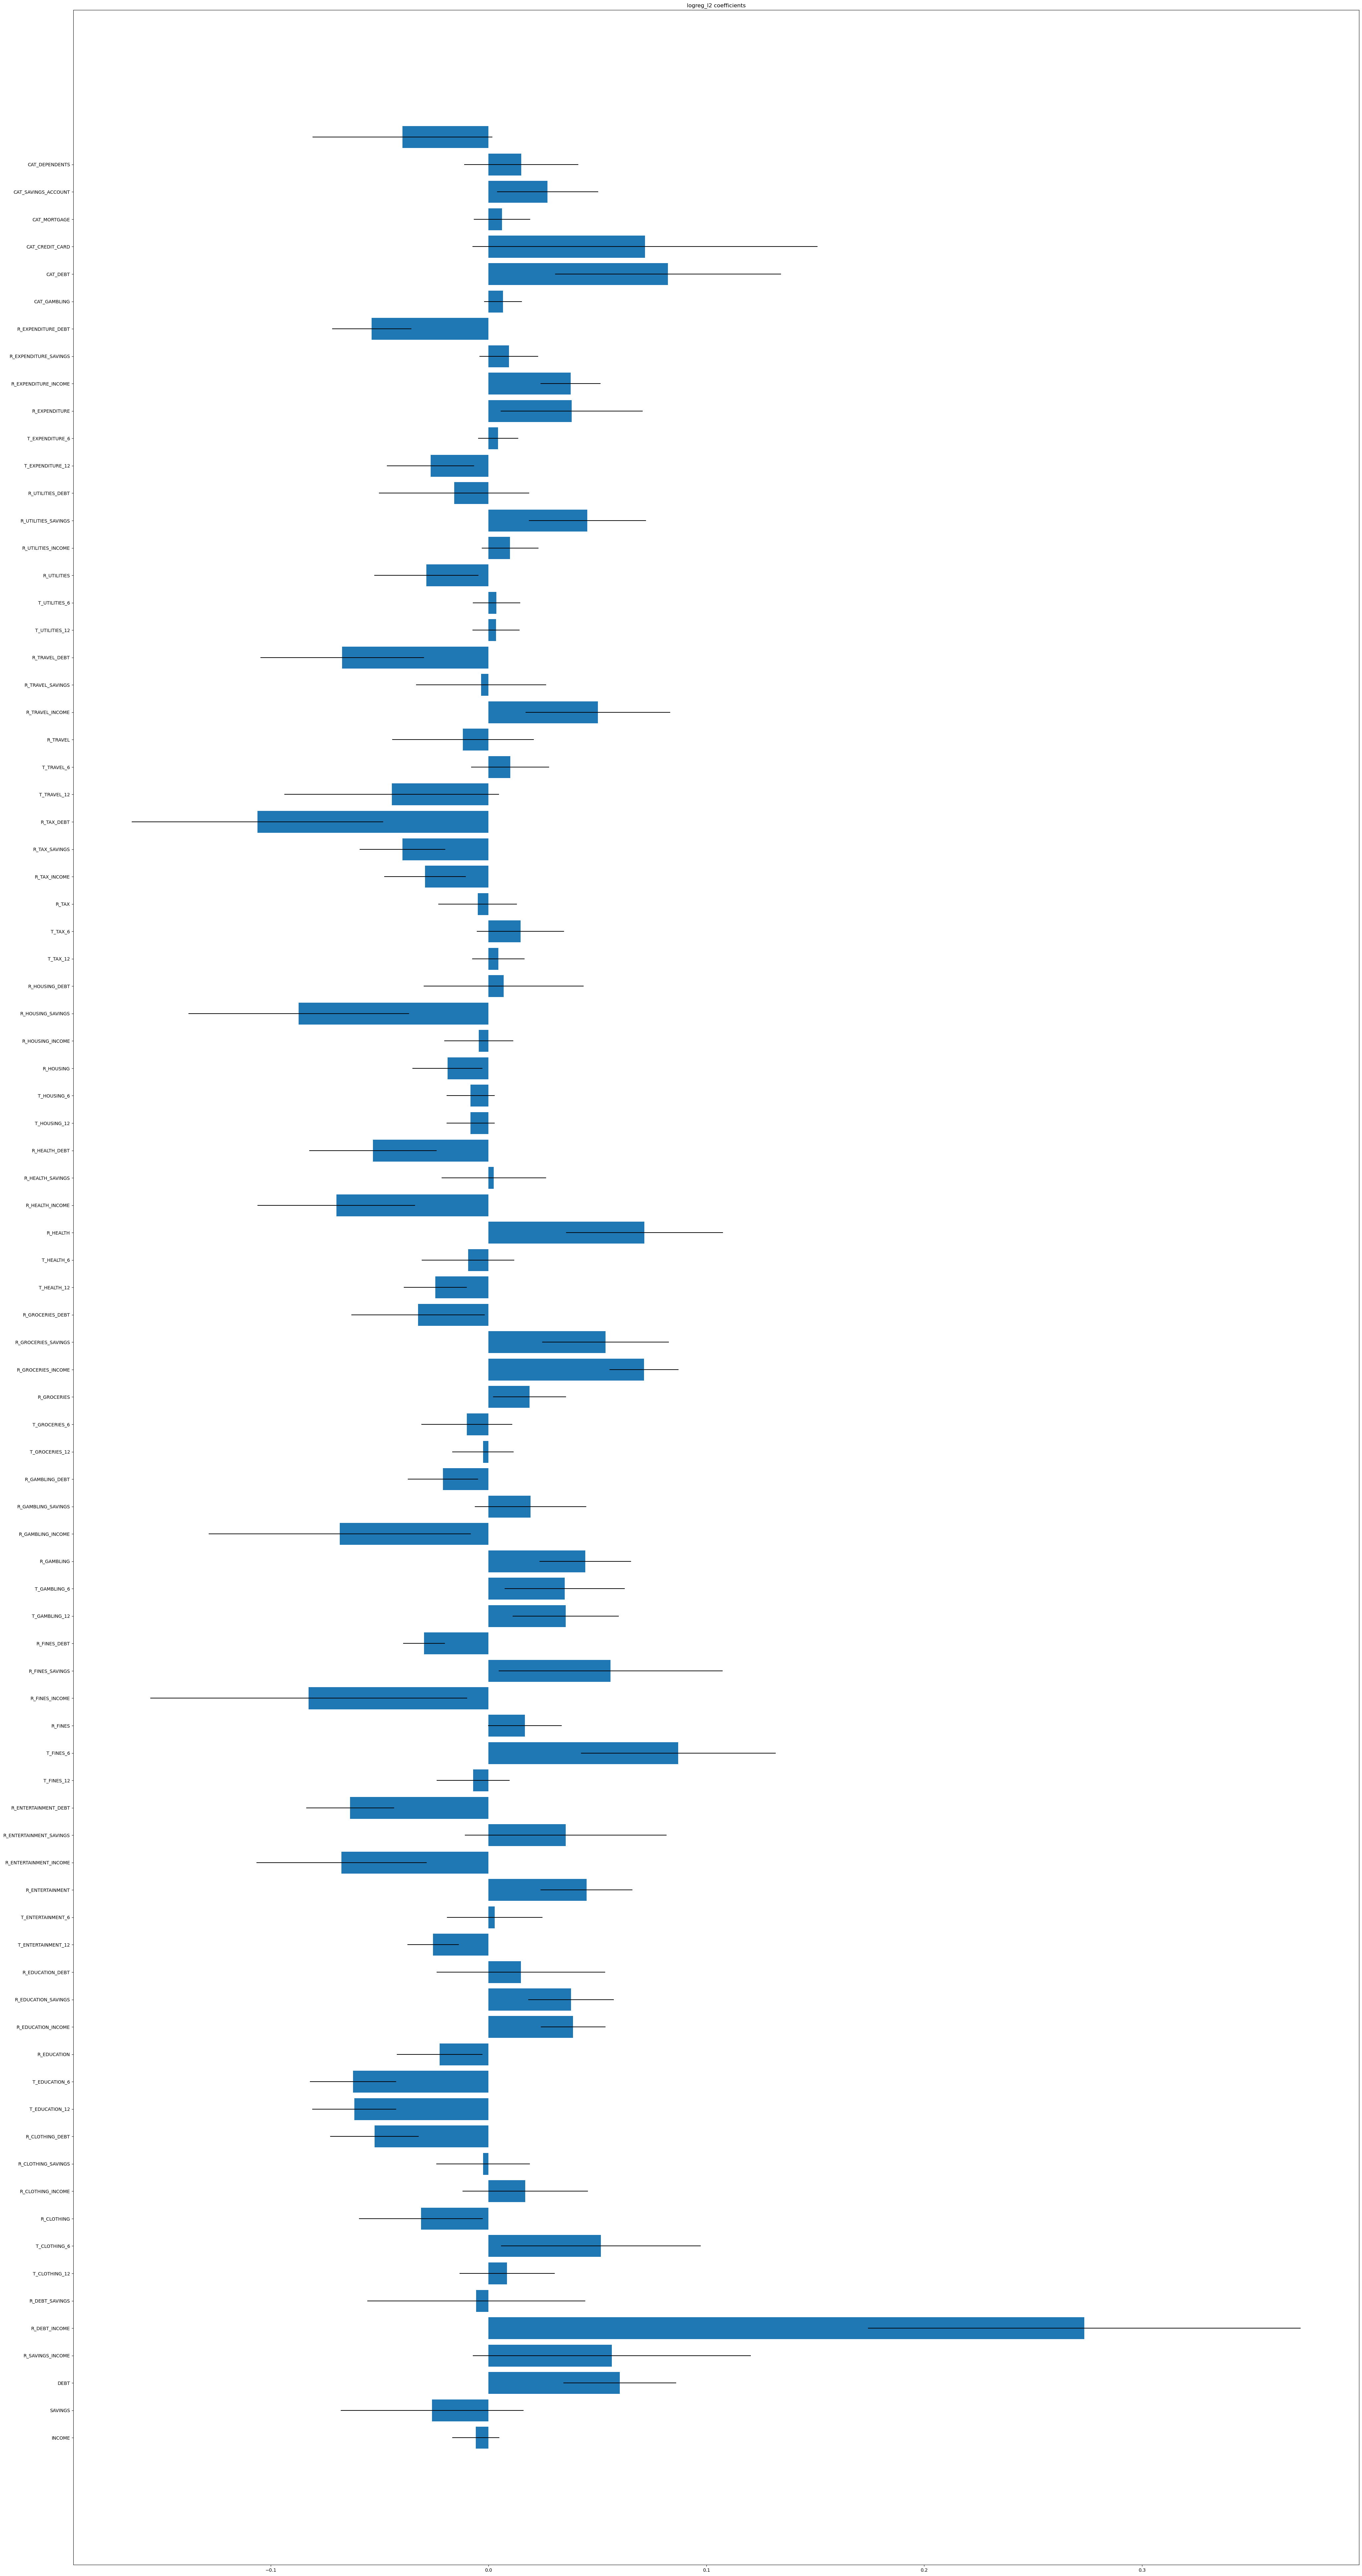

In [361]:
for model_name in ['logreg', 'logreg_l1', 'logreg_l2']:
    plt.figure(figsize=(50, 100))
    plt.title(model_name + " coefficients")
    plt.barh(y=range(len(rmeans_[model_name][0])), width=rmeans_[model_name][0], xerr=stds_[model_name][0])
    plt.yticks(ticks=range(len(X.columns)), labels=X.columns, rotation=0)

### T_EDUCATION_6, T_EDUCATION_12, R_DEBT_INCOME might be significant and have a large impact on the prediction, but actually the first two cancel each other out, so probably only R_DEBT_INCOME. For most remaining ones, there are innegligible chances that they are zero, because only a few (<= 10) of them don't have their 2*std bar touching zero.

## Regression on discrete data

We now move on to the second part of the job, which is to try to predict the credit score (column name is 'CREDIT_SCORE'). Explore the data in this variable and decide what type of model from lecture is most appropriate.

Depending on what you decide, the below methods from Scikit-learn can be used. You should again be comparing different models on multiple cross validation splits.

As an evaluation metric, what should you use? There are different choices, but for now why don't you just try to use Root mean squared error (like last week).

***Solutions***
I first plot a histogram to see the data.

<Axes: >

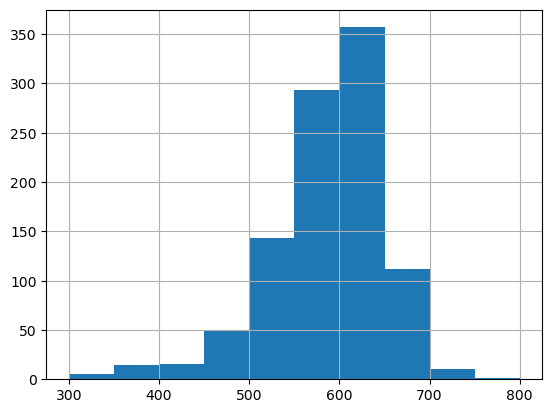

In [21]:
plt.figure()
Y_credit.hist()

So maybe using a Gaussian model (continuous valued regression) is not a terrible idea. Let's also look at the unique values that are appearing:

In [22]:
print("Unique credit scores:", Y_credit.unique())
print("Number of unique credit scores:", Y_credit.unique().size)

Unique credit scores: [444 625 469 559 473 596 580 638 636 552 538 624 582 602 651 548 576 593
 563 599 673 646 581 633 566 623 630 597 670 645 616 632 639 490 555 644
 642 695 462 654 577 652 407 545 699 453 590 529 475 541 562 601 588 572
 608 617 631 584 517 585 613 716 519 648 740 619 676 603 553 732 500 612
 504 635 564 535 447 573 714 515 556 540 544 605 647 546 598 539 520 637
 389 629 570 650 547 627 683 614 549 439 550 485 396 587 640 575 551 557
 554 628 494 600 708 682 586 656 611 620 610 574 558 409 604 578 528 323
 662 653 657 672 502 634 595 592 569 589 615 668 664 526 679 537 696 658
 675 568 583 486 524 391 665 594 435 509 531 479 385 591 609 560 643 506
 510 483 622 691 523 661 621 433 667 738 489 692 641 532 522 533 567 663
 499 498 415 688 521 686 561 480 512 330 677 618 503 505 710 565 371 543
 693 660 701 496 527 482 579 659 408 655 513 530 606 534 697 684 361 626
 455 467 386 423 518 571 477 678 607 464 536 800 488 495 516 382 420 487
 680 492 713 300 669 525 363 

So there are far fewer unique values appearing than there are measurements, which is the case with a discrete variable. So it's clear this should be treated as a discrete-valued regression problem.

But would using Ridge regression or Lasso really mess you up compared to something like Poisson regression? Only one way to find out: run an experiment!

In [362]:
from scipy.special import gammaln
def compute_poisson_log_likelihood(Y_test, X_test, beta, intercept):
    sum = 0
    for i in range(len(Y_test)): 
        y_pred = np.sum(X_test.iloc[i,:]*beta)+intercept
        sum += Y_test.iloc[i] * y_pred -  np.exp(y_pred) - gammaln(Y_test.iloc[i] + 1)
    return sum

def compute_gaussian_log_likelihood(Y_test, Y_pred):
    residuals = Y_test - Y_pred
    sigma_squared = np.var(residuals, ddof=1) 
    n = len(Y_test)
#     return -np.sum(residuals**2)
#     return -np.sum(residuals**2) / (2 * sigma_squared)
    return -n * np.log(2 * np.pi * sigma_squared) / 2 - np.sum((residuals**2) / (2 * sigma_squared))
    return n * np.log(np.reciprocal(np.sqrt(2 * np.pi * sigma_squared))) - np.sum((residuals**2) / (2 * sigma_squared))

In [363]:
means_ = dict()
stds_ = dict()

In [369]:
from sklearn.linear_model import RidgeCV, LassoCV, PoissonRegressor
from sklearn.model_selection import GridSearchCV
import time

"""
For Ridge regression, everything worked fine out of the box for me:
    
    model = RidgeCV()  # uses 5-fold cross validation by default
    model.fit(X_train, Y_train)  
    Y_pred = model.predict(X_test) 
    
For Lasso, the following worked well for me:

    model = LassoCV(max_iter=2000)  # uses 5-fold cross validation by default

And for Poisson Regression, the following setting worked well for me.

    model = PoissonRegressor(max_iter=10000)

Note that, while PoissonRegressor uses L2 regularization by default with a penalty parameter set to alpha=2,
it does not cross validate a good value for this parameter the way RidgeCV and LassoCV do for you. 

So you could consider cross validating this parameter using the sklearn.model_selection.GridSearchCV method.

"""

n_splits = 20  # number of cross validation splits

indices = list(range(X_w_dummies.shape[0]))
n_train = int(len(indices) * .85)  # 85% train, 15% split

scores = {}  # this time we will use a dictionary structure to contain the errors
for model_name in ['ridge', 'lasso', 'poisson', 'poisson_cv']:
    scores[model_name] = []  # initialize this dictionary entry to an empty list
    means_[model_name] = []
    stds_[model_name] = []
# I'm lazy so I'll just do random sampling of test sets (instead of K-fold cross validation)
for i_ in range(n_splits):
    
    t_start = time.time()  # used to time things
        
    np.random.shuffle(indices)  # shuffles the list in-place, so returns nothing
    train_inds = indices[:n_train]  # the first 85% are training indices
    test_inds = indices[n_train:]  # the remaining 15% are testing indices
    
    X_train = X_w_dummies.iloc[train_inds, :].copy()  # remember .iloc is used for integer indexing!
    X_test = X_w_dummies.iloc[test_inds, :].copy()
    
    Y_train = Y_credit.iloc[train_inds]
    Y_test = Y_credit.iloc[test_inds]
    
    # standardize the predictors
    for key in columns_to_normalize:
        x_mean = X_train[key].mean()
        x_std = X_train[key].std()
        X_train.loc[:, key] = (X_train[key] - x_mean) / x_std
        X_test.loc[:, key] = (X_test[key] - x_mean) / x_std  # use the training statistics to transform the test cases
    
    model = RidgeCV()  # uses 5-fold cross validation by default
    model.fit(X_train, Y_train)  
    Y_pred = model.predict(X_test) 
#     rmse = np.sqrt(np.mean((Y_test - Y_pred)**2.0))
    log_likelihood = compute_gaussian_log_likelihood(Y_test, Y_pred)
    means_['ridge'].append(model.coef_)
    scores['ridge'].append(log_likelihood)
    print("Finished ridge split:", i_)
    
    model = LassoCV(max_iter=2000)  # uses 5-fold cross validation by default
    model.fit(X_train, Y_train)  
    Y_pred = model.predict(X_test) 
#     rmse = np.sqrt(np.mean((Y_test - Y_pred)**2.0))
    log_likelihood = compute_gaussian_log_likelihood(Y_test, Y_pred)
    means_['lasso'].append(model.coef_)
    scores['lasso'].append(log_likelihood)
    print("Finished lasso split:", i_)
    
    # Poisson Regressor uses L2 regularization with a penalty parameter alpha=1 by default!
    model = PoissonRegressor(max_iter=10000)
    model.fit(X_train, Y_train)  
    Y_pred = model.predict(X_test)  # this gives us the probabilities of each label
#     rmse = np.sqrt(np.mean((Y_test - Y_pred)**2.0))
    means_['poisson'].append(model.coef_)
#     print(model.coef_)
#     print(model.intercept_)
#     break
    log_likelihood = compute_poisson_log_likelihood(Y_test, X_test, model.coef_, model.intercept_)
    log_likelihood = compute_gaussian_log_likelihood(Y_test, Y_pred)
    scores['poisson'].append(log_likelihood)
    print("Finished poisson split:", i_)
    
    # ...but it isnt' cross validated like the other methods... here is how to use sklearn to make CV easy
    regressor = PoissonRegressor(max_iter=10000)
    model = GridSearchCV(estimator=regressor, param_grid={'alpha': np.linspace(0.1, 10, 10)})  # uses 5-fold cross validation by default
    model.fit(X_train, Y_train)  
    Y_pred = model.predict(X_test)  # this gives us the probabilities of each label
#     print(model.get_params())
#     break
#     rmse = np.sqrt(np.mean((Y_test - Y_pred)**2.0))
    best_estimator = model.best_estimator_
    log_likelihood = compute_poisson_log_likelihood(Y_test, X_test, best_estimator.coef_, best_estimator.intercept_)
    log_likelihood = compute_gaussian_log_likelihood(Y_test, Y_pred)
    means_['poisson_cv'].append(best_estimator.coef_)
    scores['poisson_cv'].append(log_likelihood)
    print("Finished poisson CV split:", i_)
    
    t_elapsed = time.time() - t_start
    print("This split took: %.2f secs" % t_elapsed)

Finished ridge split: 0
Finished lasso split: 0
Finished poisson split: 0
Finished poisson CV split: 0
This split took: 7.09 secs
Finished ridge split: 1
Finished lasso split: 1
Finished poisson split: 1
Finished poisson CV split: 1
This split took: 6.32 secs
Finished ridge split: 2
Finished lasso split: 2
Finished poisson split: 2
Finished poisson CV split: 2
This split took: 6.65 secs
Finished ridge split: 3
Finished lasso split: 3
Finished poisson split: 3
Finished poisson CV split: 3
This split took: 5.76 secs
Finished ridge split: 4
Finished lasso split: 4
Finished poisson split: 4
Finished poisson CV split: 4
This split took: 5.89 secs
Finished ridge split: 5
Finished lasso split: 5
Finished poisson split: 5
Finished poisson CV split: 5
This split took: 7.22 secs
Finished ridge split: 6
Finished lasso split: 6
Finished poisson split: 6
Finished poisson CV split: 6
This split took: 5.80 secs
Finished ridge split: 7
Finished lasso split: 7
Finished poisson split: 7
Finished poisson

Text(0, 0.5, 'Log Likelihood')

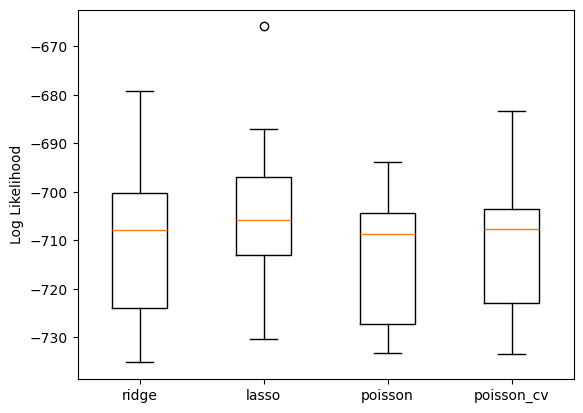

In [370]:
# plot the results
plt.figure()
plt.boxplot([scores['ridge'], scores['lasso'], scores['poisson'], scores['poisson_cv']], 
            labels=['ridge', 'lasso', 'poisson', 'poisson_cv'])
plt.ylabel('Log Likelihood')

In [371]:
print(wilcoxon(scores['ridge'], scores['lasso']).pvalue)
print(wilcoxon(scores['ridge'], scores['poisson_cv']).pvalue)
print(wilcoxon(scores['lasso'], scores['poisson_cv']).pvalue)
print(ttest_rel(scores['ridge'], scores['lasso']).pvalue)
print(ttest_rel(scores['ridge'], scores['poisson_cv']).pvalue)
print(ttest_rel(scores['lasso'], scores['poisson_cv'], alternative="greater").pvalue)
print(ttest_rel(scores['poisson'], scores['poisson_cv'], alternative="less").pvalue)
print(wilcoxon(scores['poisson'], scores['poisson_cv']).pvalue)

1.9073486328125e-06
0.0758514404296875
3.62396240234375e-05
9.493920260574365e-06
0.05965572299548158
5.312414275188092e-06
8.346168147981909e-05
1.9073486328125e-05


### Lasso better than Ridge better than (significance lvl 0.1 in another run of the experiment) Poisson_cv better than poisson at a statitically significant level

In [373]:
import matplotlib.pyplot as plt

rmeans_ = dict()
for model_name in ['ridge', 'lasso', 'poisson', 'poisson_cv']:
    stds_[model_name] = np.std(np.array(means_[model_name]), axis=0)
    rmeans_[model_name] = np.mean(np.array(means_[model_name]), axis=0)
#     plt.figure(figsize=(200, 100))
#     plt.barh(y=range(len(means_[model_name][0])), width=means_[model_name][0], xerr=stds_[model_name][0])
#     plt.yticks(ticks=range(len(X_w_dummies.columns)), labels=X_w_dummies.columns, rotation=0)

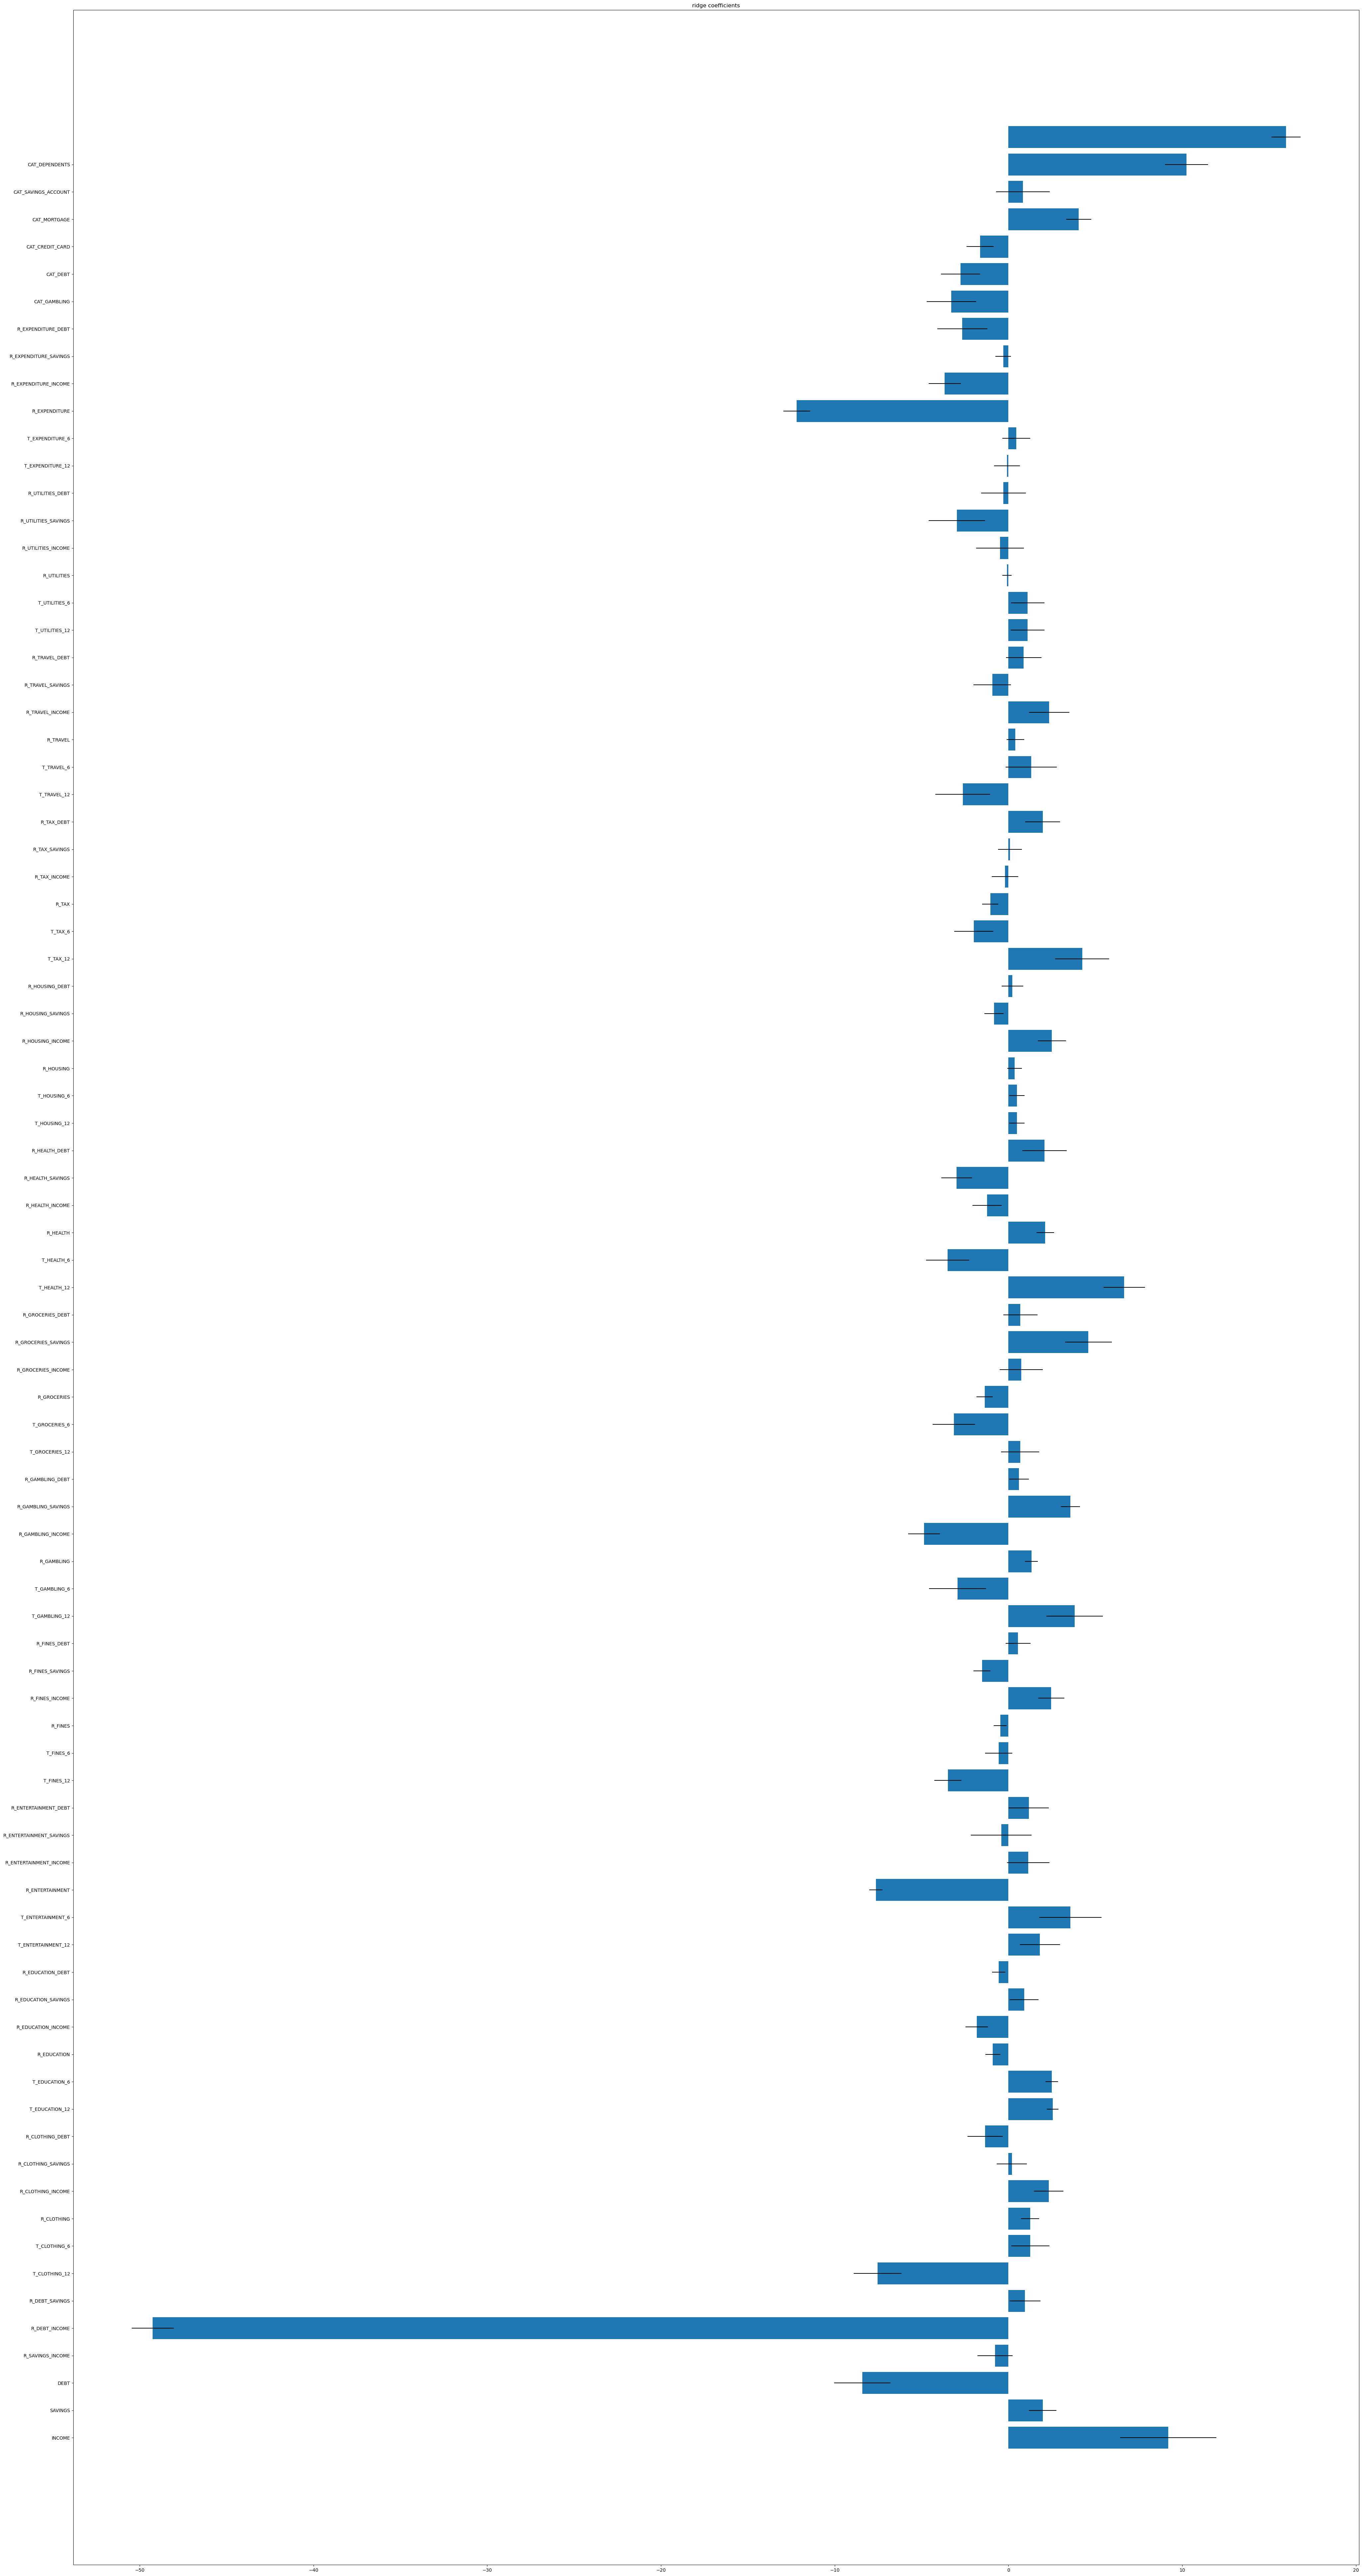

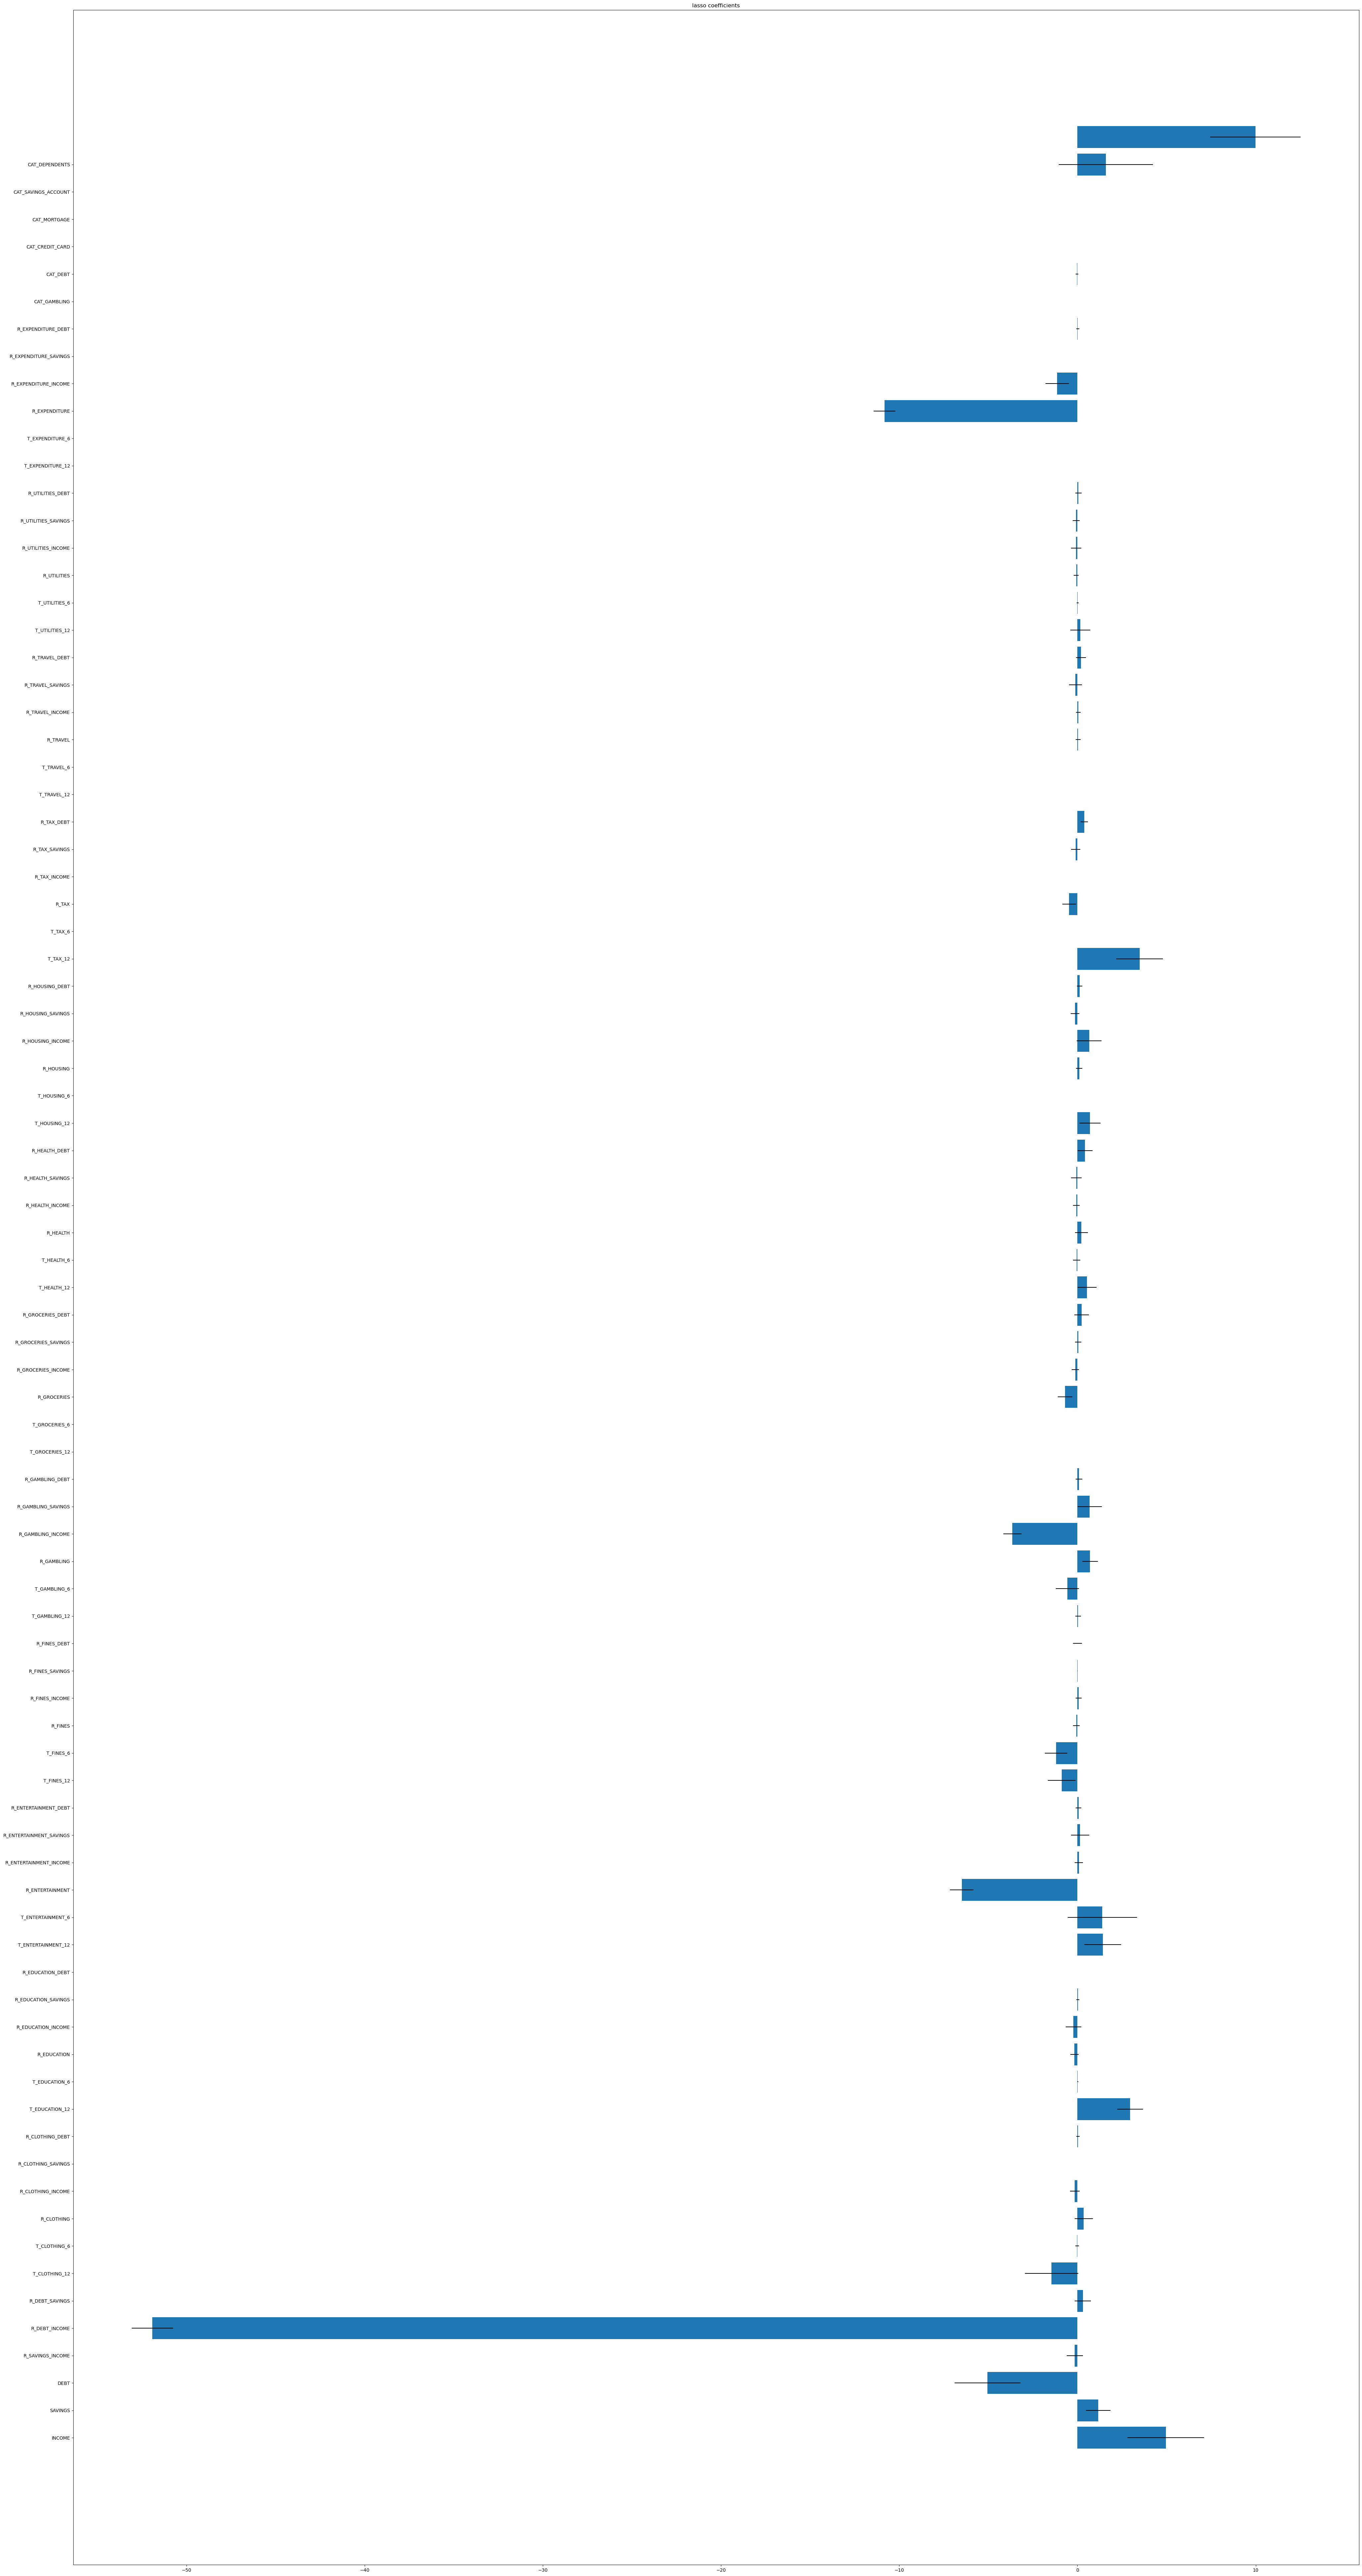

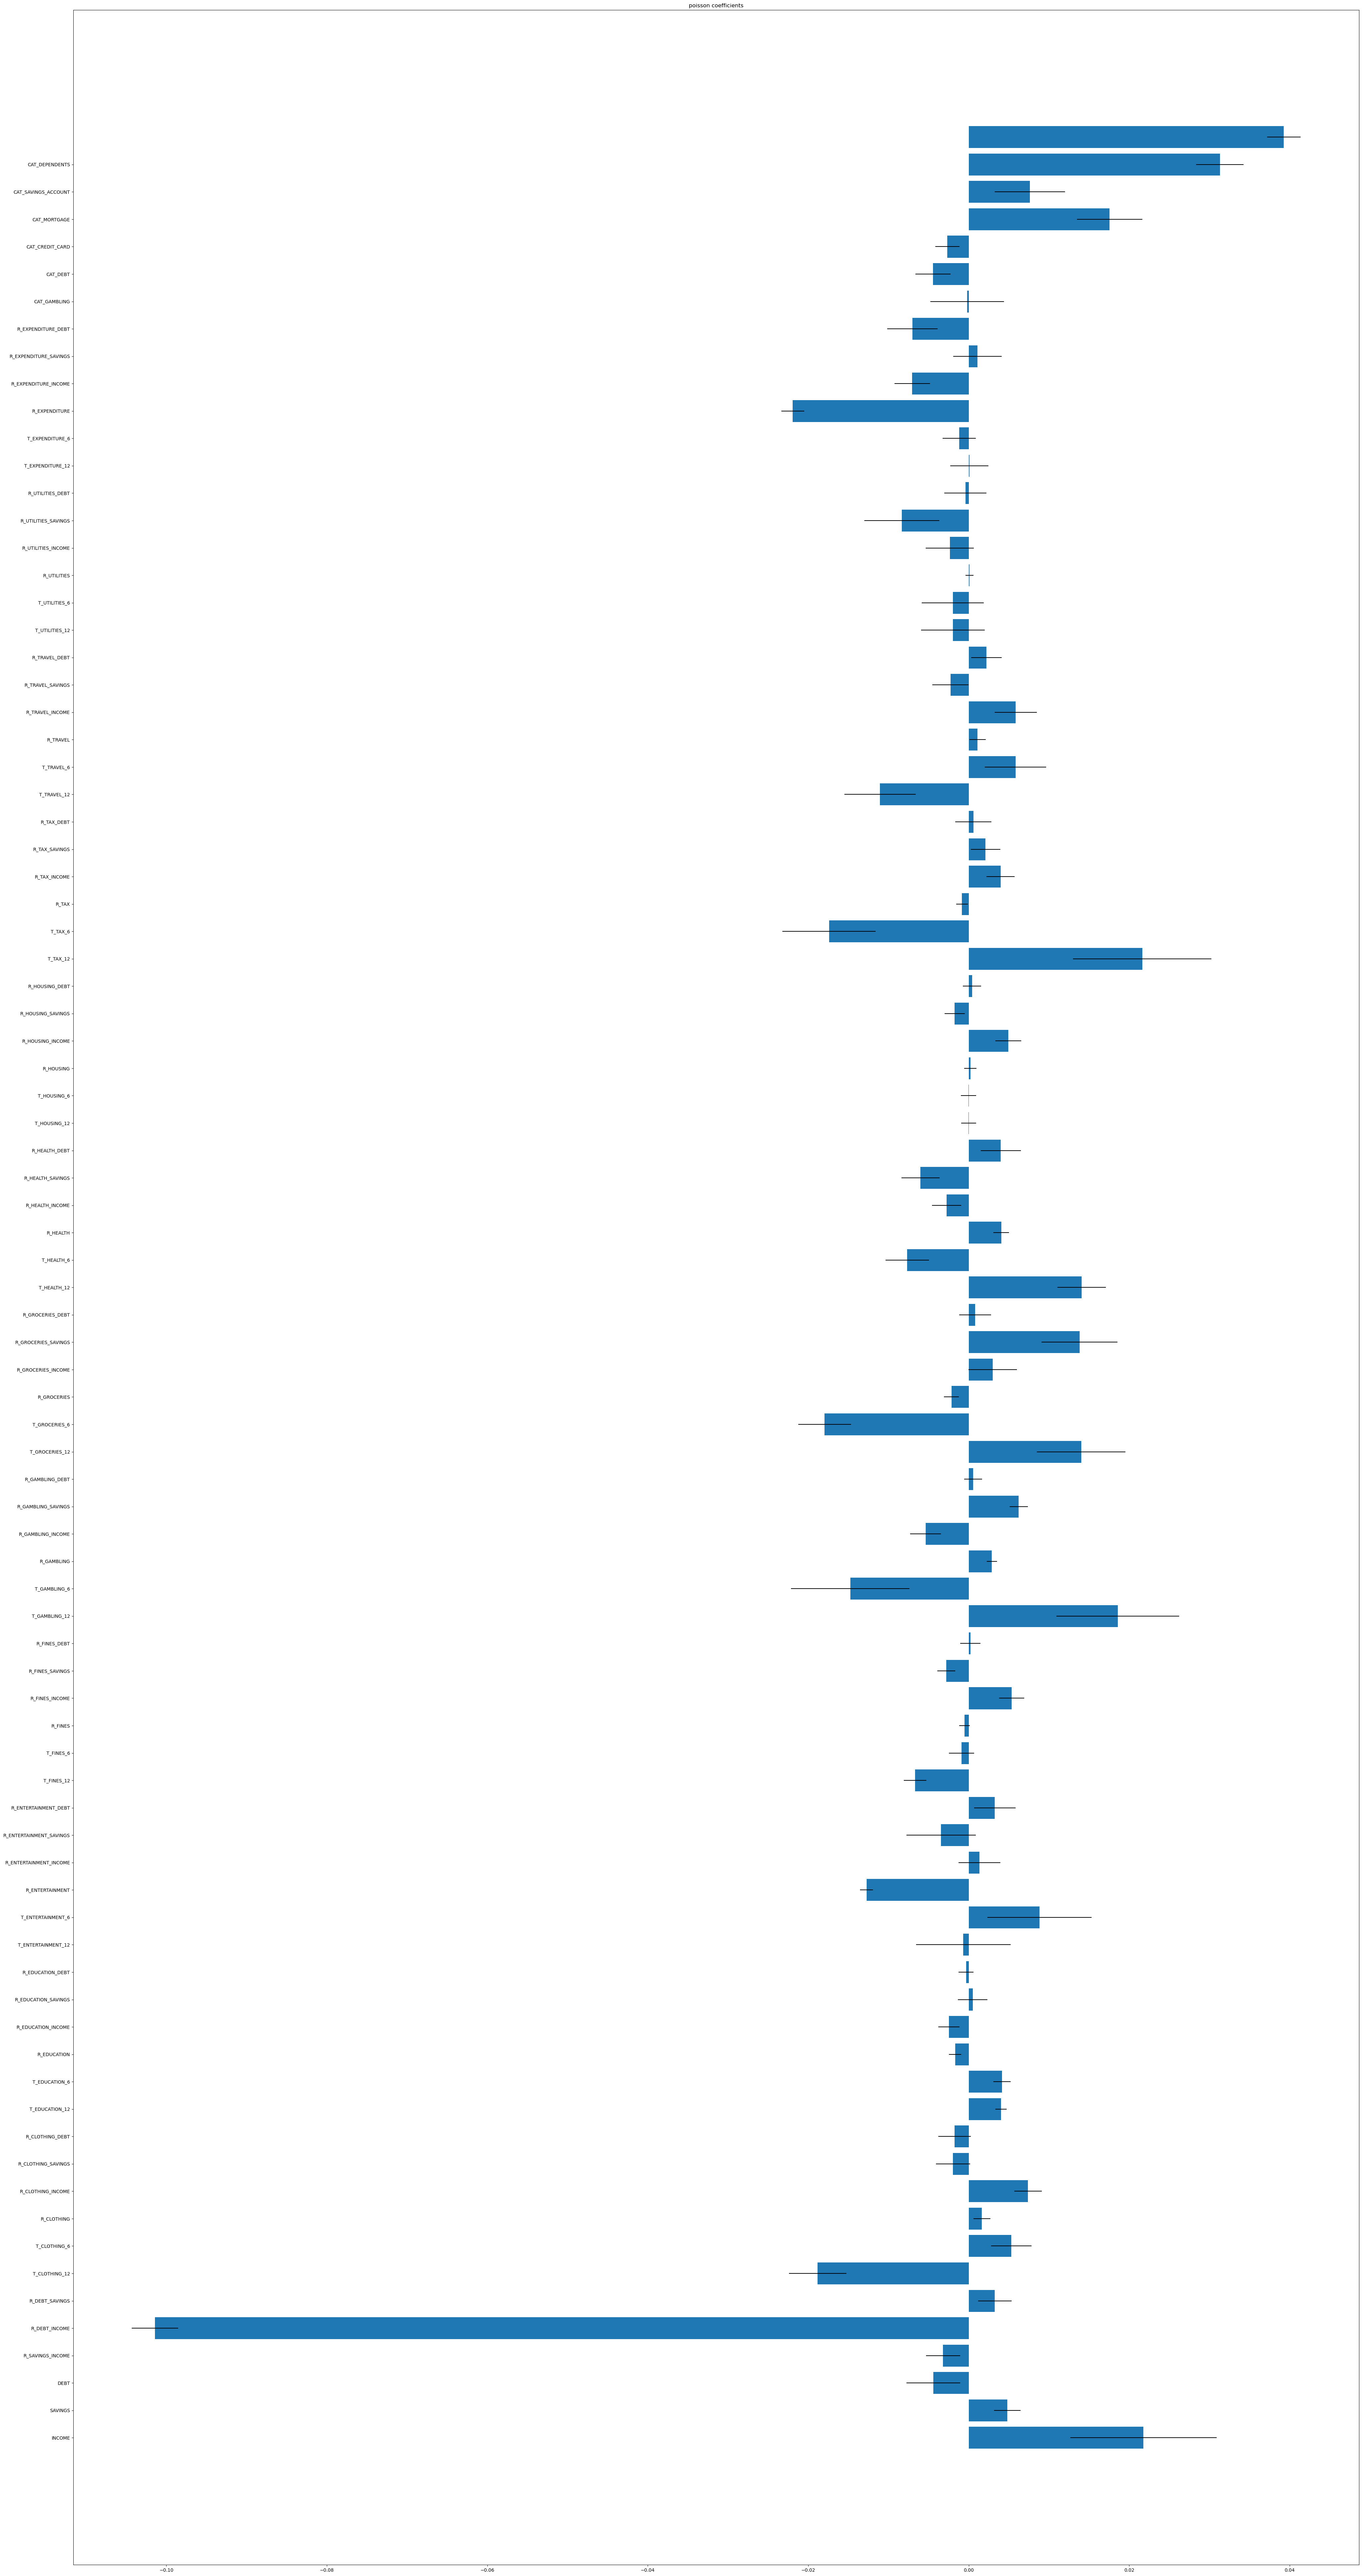

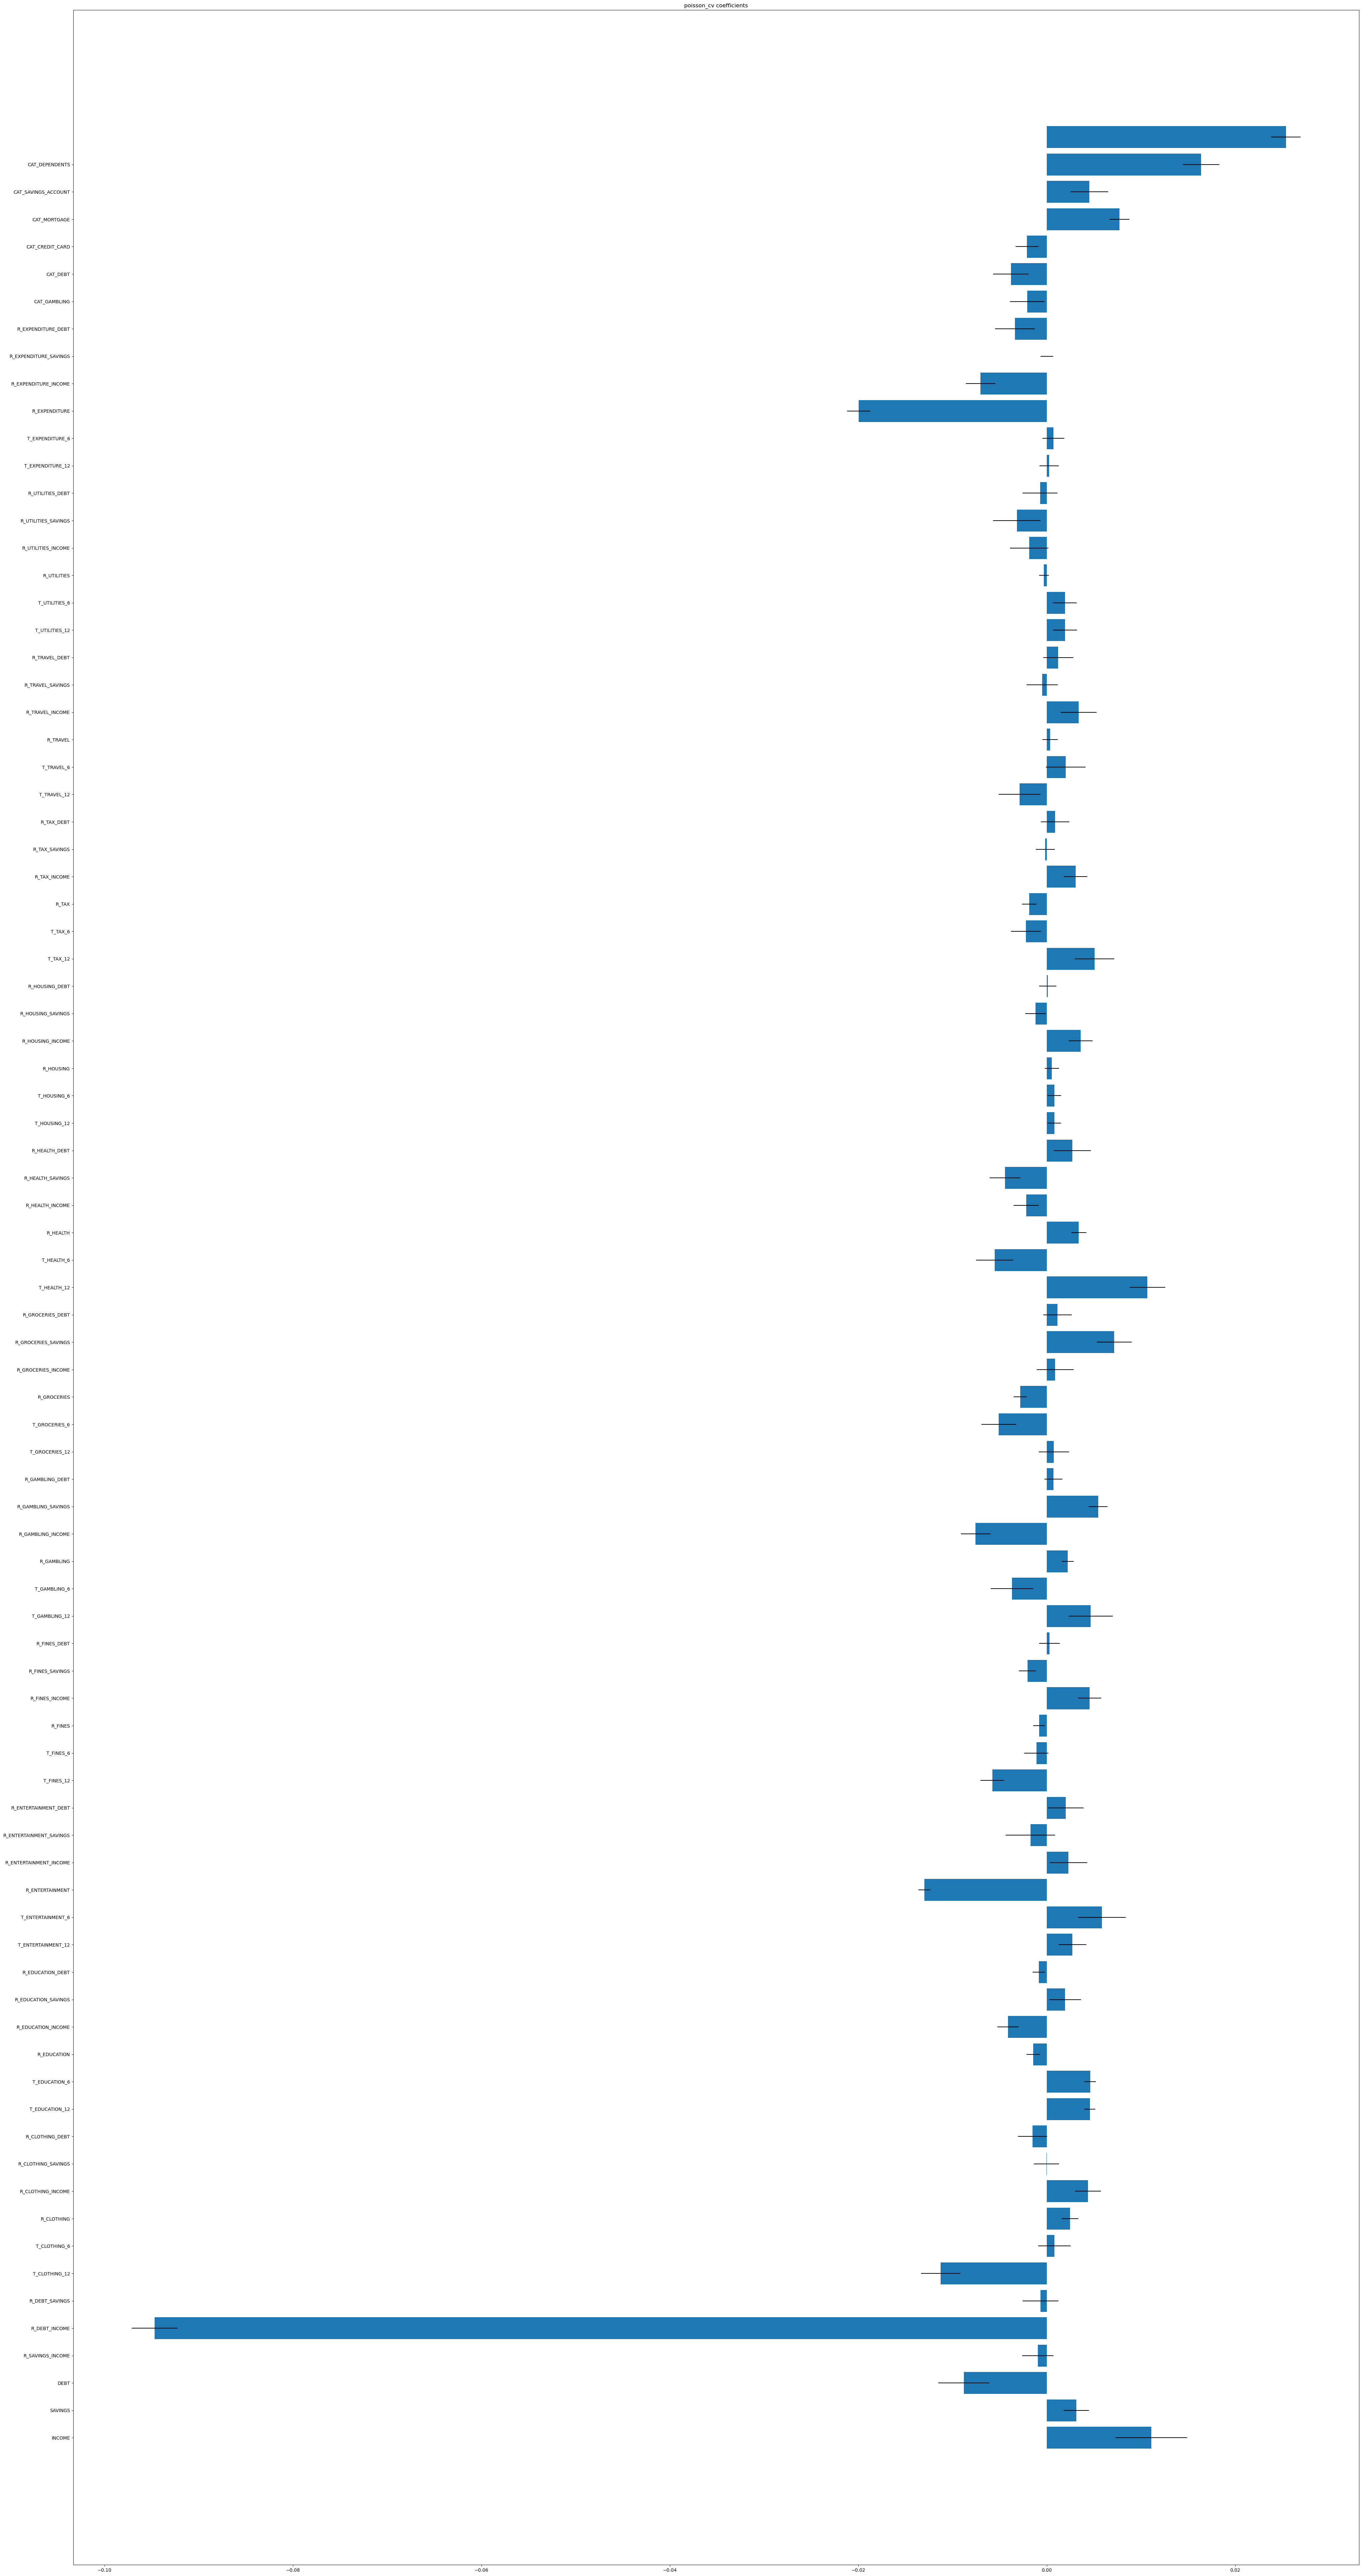

In [376]:
import matplotlib.pyplot as plt

for model_name in ['ridge', 'lasso', 'poisson', 'poisson_cv']:
    plt.figure(figsize=(50, 100))
    plt.title(model_name + " coefficients")
    plt.barh(y=range(len(rmeans_[model_name])), width=rmeans_[model_name], xerr=stds_[model_name])
    plt.yticks(ticks=range(len(X.columns)), labels=X.columns, rotation=0)

### R_DEBT_INCOME, INCOME, R_EXPENDITURE_INCOME, CAT_DEPENDENTS, (CAT_SAVINGS_ACCOUNT?) might be significant and have a large impact on the prediction. For most remaining ones, there are innegligible chances that they are zero, because only around a dozen to 15 of them don't have their 2*std bar touching zero, so for predicting the credit score, there might be more factors that are useful than for predicting whether or not they default.